<a href="https://colab.research.google.com/github/JhanXXX/AI-in-Transport-TTGTM/blob/main/E5_claster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**My chosen track:**

Advanced - More proper selection of clustering for real-world applications when you do not know your future days is to select a test sub-dataset for training the clustering in combination with prediction models and decide which clustering to select. For this track, the recommended prediction model is one provided in the exercise: centroid cluster-based historical mean prediction.

Part 1: Data exploration

In [1]:
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/E5-AITransportation/dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
df.head()
df.insert(df.shape[1],'day',-1)

In [2]:
# Translate Date to Weekday
import datetime
def is_weekday(df,index):
  spot = str(df['Date'][index])
  # print (spot)
  year = int (spot[0:4])
  month = int (spot[4:6])
  day = int (spot[6:8])
  # print (year,month,day)
  dtag = datetime.date(year,month,day).weekday() + 1
  # print (dtag)
  return (dtag)

for i in range (df.shape[0]):
  df['day'][i] = is_weekday(df,i)

Streaming output truncated to the last 5000 lines.
<ipython-input-2-944b2e1c6f45>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][i] = is_weekday(df,i)
<ipython-input-2-944b2e1c6f45>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][i] = is_weekday(df,i)
<ipython-input-2-944b2e1c6f45>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][i] = is_weekday(df,i)
<ipython-input-2-944b2e1c6f45>:15: SettingWithCop

In [40]:
df.head()


,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow,day
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39,5
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18,5
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26,5
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52,5
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52,5


In [4]:
# Make the data frame the way we want to claster: be sure, what type of value is on the x axis and what is on the y.

# Sort the DataFrame 'df' by columns "Date" and "Interval_5"
df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted DataFrame
days = np.unique(df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)

# Group the DataFrame 'df' by the "Date" column
day_subsets_df = df.groupby(["Date"])

# Define the total number of 5-minute intervals in a day
nintvals = len(np.unique(df[['Interval_5']].values.ravel()))

# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)

print (ndays)
print (nintvals)

365
288


In [5]:
# Loop through each unique day, fill in the matrix
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset'
print(vectorized_day_dataset)

[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]


In [8]:
print (vectorized_day_dataset.shape)


(365, 288)


 Here is clear: date (in order) - intervals in a day.
 We lost the exact information on date though, and that is way we were sorting at the beginning.

In [21]:
print('number of nans',np.sum(np.isnan(vectorized_day_dataset)))
print('rate of nans',np.sum(np.isnan(vectorized_day_dataset))/(ndays*nintvals))

print('number of non-zeros',np.sum(np.count_nonzero(vectorized_day_dataset)))
print('rate of non-zeros',np.sum(np.count_nonzero(vectorized_day_dataset))/(ndays*nintvals))

number of nans 277
rate of nans 0.0026350837138508373
number of non-zeros 105120
rate of non-zeros 1.0


confusions here: why use "sum" -> actually, the function np.isnan() returns a boolean value, so calling sum() can calculation the number of non-null arrays.
On the other hand, real data could be tricky. I think this part has neglected a fact that not all non-useful data is NaN. They could be 0, -1 or others, which depends on how the data is collected. this tutorial hasn't really clarified this point but i think it would be important for tackling real problems.
On the other hand, np.count_nonzero() directly counts how many elements are non-zero, while ignoring NaNs, and returns the number.

Apperantly, according to the output above, we can tell that the empty values exist in terms of NaN.

(288,)
277


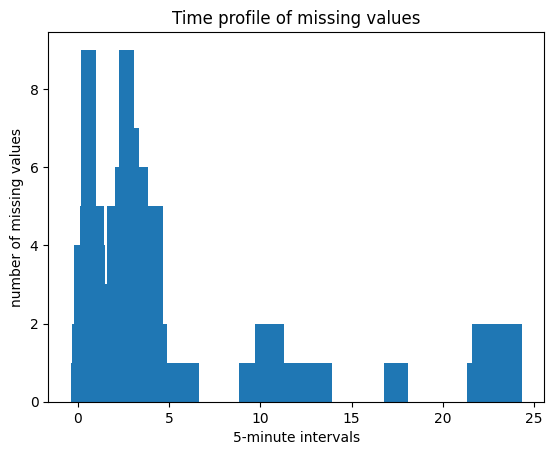

In [25]:
# try to identify the feature of missing value

nans_per_time = np.sum(np.isnan(vectorized_day_dataset),0)
total_nans = np.sum(nans_per_time)
print(nans_per_time.shape)
print(total_nans)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# Create an array 'x_axis' representing the 5-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)
# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []
# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
  x_axis_hours.append(float(x_axis[i]*5)/60)
ax.bar(x_axis_hours,height=nans_per_time)
ax.set_ylabel('number of missing values')
ax.set_xlabel('5-minute intervals')
ax.set_title('Time profile of missing values')

plt.show()

Another confusion appears: why 277, and why 288? After searching, I found the answer:

Global count (np.sum(np.isnan(...))) gives the total number of NaN values in the entire dataset (277).
Column-wise count (np.sum(np.isnan(...), 0)) gives you an array of NaN counts for each column, printing shape could show a 288 here, not the total number of NaN values, and may not be the same value as the Global count

In [28]:
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print(nans_per_day.shape)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))

(365,)
number of days with missing value 28


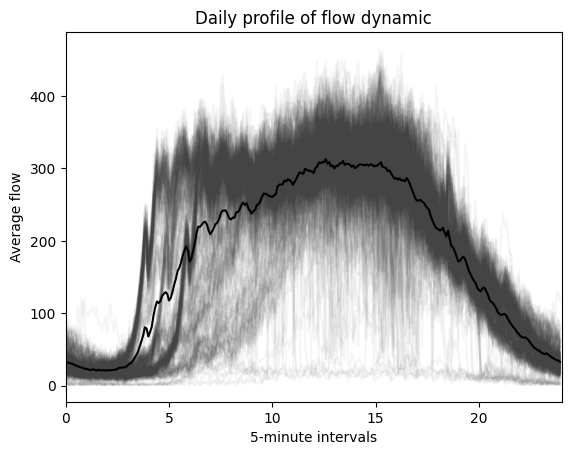

In [36]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()# a convenient way to create a new figure and a set of subplots.
ax.plot(np.array([x_axis_hours,]*ndays).transpose(),vectorized_day_dataset.transpose(),color='#444444',alpha=0.05)
# Above line plots the dataset with specified color and transparency.
ax.plot(x_axis_hours,np.transpose(np.nanmean(vectorized_day_dataset,0)),color='black')
# Above line plots the average of the dataset in black color.

ax.set_ylabel('Average flow')
ax.set_xlabel('5-minute intervals')
plt.xlim(0,24)
ax.set_title('Daily profile of flow dynamic')

plt.show()

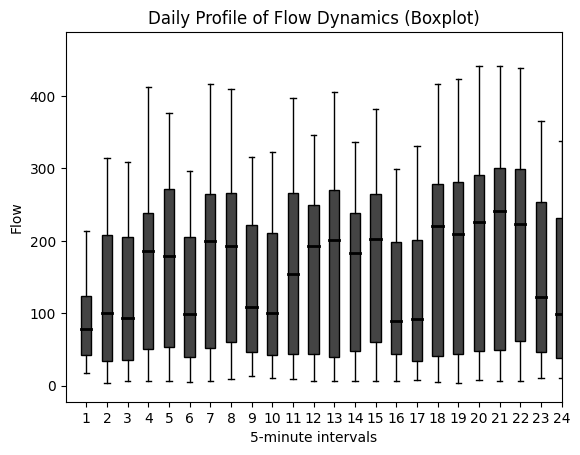

In [56]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()  # This line is a convenient way to create a new figure and a set of subplots.
# Create a boxplot for the dataset
boxplot = ax.boxplot(vectorized_day_dataset.T, patch_artist=True)
# Customize the boxplot appearance
for patch in boxplot['boxes']:
    patch.set_facecolor('#444444')  # Set the box color to gray
for median in boxplot['medians']:
    median.set(color='black', linewidth=2)  # Set median line color to black
# Set the y-axis label
ax.set_ylabel('Flow')
# Set the x-axis label
ax.set_xlabel('5-minute intervals')
# Set the x-axis limits to be between 0 and 24
plt.xlim(0, 24)
# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics (Boxplot)')
# Display the plot
plt.show()

In [47]:
# On the other hand, try week-days (monday-tuesday-wedn...)

# Sort the DataFrame 'df' by columns "Day" and "Interval_5"
df.sort_values(["day", "Interval_5"])

# There are obviously 7 days per week but just in case:
weeks = np.unique(df[['day']].values.ravel())
nweeks = len(weeks)

# Group the DataFrame 'df' by the "Day" column
weeks_subsets_df = df.groupby(["day"])

In [ ]:
# Loop through each week-day, fill in the matrix
df_weeks = []
for i in range(0, nweeks):
    df_t = weeks_subsets_df.get_group(weeks[i])
    df_weeks.append([])
    for j in range(len(df_t)):
        df_t = weeks_subsets_df.get_group(weeks[i])
        df_weeks[i].append(df_t.iloc[j]["flow"])

In [49]:
print(len(df_weeks))
for i in range(len(df_weeks)):
  print(len(df_weeks[i]))

7
14927
14882
14915
14950
15239
14976
14954


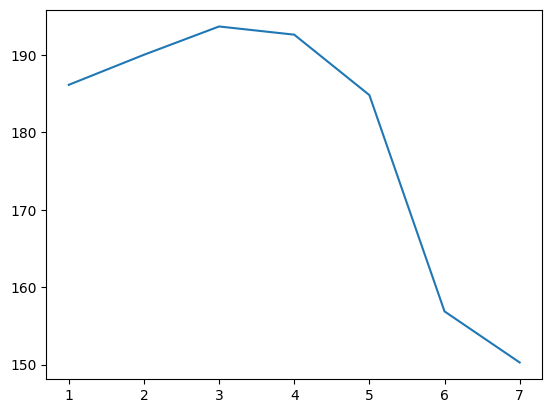

In [55]:
plot_weekdays_x = [1,2,3,4,5,6,7]
plot_weekdays_y = []
for i in range(len(df_weeks)):
  plot_weekdays_y.append(sum(df_weeks[i])/len(df_weeks[i]))
plt.plot(plot_weekdays_x,plot_weekdays_y)

It can be seen that on weekends the traffic flow drops from 180-190 to 150-160. Thus, it may be interesting to look into more details. When I was doing the task, I added whatever had jumped into my mind. Here I've got something:
It is also important to introduce the idea of "roughly explore the patterns", just like how hyperparameter tunning does. When facing the real huge dataset whose meaning might be unclear, it might be quite time-consuming and low-efficient if we do every exploration to the full details. For example, here I examined the average value of each day in a week first. There is apparently no strict rule nor clear methodology structure (at least as far as I believe), and SHOULDN'T, for the real world data, because such context might limit people's imagination, which makes it even more important to keep that in mind. We can't just rely on the libraries all the time.

I did not yet clear my own mind about why would I do this here, but I feel this is important...

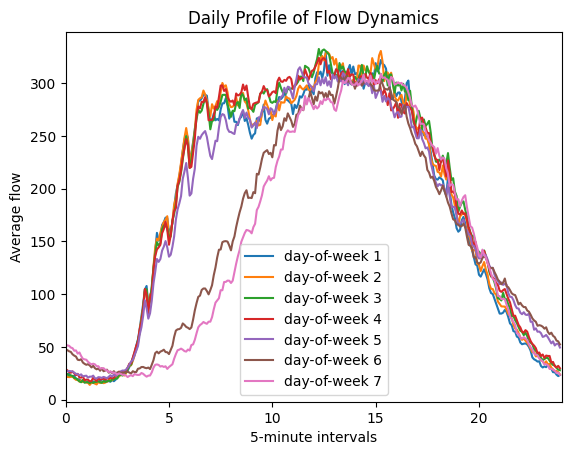

In [57]:
# Then look into each day's specific distribution
import datetime

# Create an array 'day_of_week' to store the day of the week for each unique date
day_of_week = np.zeros((ndays))

# Loop through each unique date
for i in range(0, ndays):
    # Parse the current date from a string to a datetime object
    day_dt = datetime.datetime.strptime(str(days[i]), '%Y%m%d')

    # Get the day of the week (1 for Monday, 2 for Tuesday, ..., 7 for Sunday)
    day_of_week[i] = day_dt.isoweekday()
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()

# Iterate through each day of the week (from 1 to 7)
for i in range(1, 8):
    # Find the indices of days that correspond to the current day of the week
    day_of_week_index_t = np.where(day_of_week == i)

    # Calculate the number of days that match the current day of the week
    ndays_t = np.size(day_of_week_index_t[0])

    # Plot the average flow for the current day of the week
    ax.plot(x_axis_hours,
            np.nanmean(vectorized_day_dataset[day_of_week_index_t[0], :].transpose(), 1),
            label='day-of-week ' + str(i))
    # This line plots the average flow for the current day of the week.
    # 'np.nanmean()' calculates the mean while handling NaN values.

# Set the y-axis label
ax.set_ylabel('Average flow')
# Set the x-axis label
ax.set_xlabel('5-minute intervals')
# Set the x-axis limits to be between 0 and 24
plt.xlim(0, 24)
# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics')
# Add a legend indicating the day of the week
ax.legend()
# Display the plot
plt.show()

In [104]:
# start clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
n_clusters = 10
clusters_KM = None

vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
days_not_nans = days[np.where(nans_per_day == 0)[0]]

clusters_KM = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

if clusters_KM is not None:
  clusterKM_labels = clusters_KM.labels_
  clusterKM_labelsGM = GaussianMixture(n_components=n_clusters).fit(vectorized_day_dataset_no_nans).predict(vectorized_day_dataset_no_nans)

In [59]:
#visualization
from dateutil.relativedelta import relativedelta
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib import colors

def assign_colors(n_clusters, days, assigments):

    days_colors = []
    color_to_cluster = []
    style_to_cluster = []
    weekend_colors = ['#67001f','#d6604d','#fdae61','#f46d43','#d53e4f','#9e0142','#f768a1','#f1c232']#,'#fe9929','#cc4c02','#e31a1c','#737373','#bdbdbd','#252525','#bcbddc']
#    weekend_school_colors = ['#c2a5cf','#f1b6da','#8e0152','#c51b7d','#de77ae','#ae017e','#fcc5c0','#e31a1c','#737373','#bdbdbd']
#    bank_holidays_colors = ['#543005','#dfc27d','#bf812d','#8c510a']
    mixed_colors = ['#4d4d4d','#35978f','#bababa','#878787']
    weekday_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#cab2d6','#6a3d9a','#b15928','#8dd3c7','#bebada','#fb8072','#b3de69','#bc80bd','#fccde5','#ccebc5','#35978f','#80cdc1']

    cluster_id_weekdays_share = []
    cluster_id_weekend_share = []
    cluster_id_all_days = []

    for i in range(0,n_clusters):
        color_to_cluster.append(None)
        style_to_cluster.append(None)
        cluster_id_weekdays_share.append(0)
        cluster_id_weekend_share.append(0)
        cluster_id_all_days.append(0)

    for i in range(0,len(days)):
        #print(i,assigments[i],len(assigments),len(cluster_id_all_days))
        if assigments[i] is not None:
            cluster_id_all_days[assigments[i]] += 1
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')

            if int(pomT.weekday()) < 5:
                cluster_id_weekdays_share[assigments[i]] += 1
            else:
                cluster_id_weekend_share[assigments[i]] += 1

    print('cluster_id_weekdays_share',cluster_id_weekdays_share)
    print('cluster_id_weekend_share',cluster_id_weekend_share)
    for i in range(0,len(days)):
        if assigments[i] is not None:
            cluster_idx = assigments[i]
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
            if color_to_cluster[assigments[i]] is None:
                if cluster_id_weekend_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekend_colors.pop()
                        style_to_cluster[assigments[i]] = ':'
                elif cluster_id_weekdays_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekday_colors.pop(0)
                        style_to_cluster[assigments[i]] = '-'
                else:
                    color_to_cluster[assigments[i]] = mixed_colors.pop()
                    style_to_cluster[assigments[i]] = ':'

            days_colors.append(color_to_cluster[assigments[i]])
        else:
            days_colors.append(None)

    return days_colors,color_to_cluster,style_to_cluster


def calmap(ax, year, data, days, assigments, n_clusters,days_colors,color_to_cluster,
           limit_graphics=False):

    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders

    xticks, labels = [], []
    start = datetime.datetime(year,1,1).weekday()

    for month in range(1,13):

        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]

        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",

                       linewidth=1, zorder=20, clip_on=False)

        ax.add_artist(poly)

    line = Line2D([0,53],[5,5],linewidth=1, zorder = 20,color="black",linestyle='dashed')
    ax.add_artist(line)

    if not limit_graphics:
        ax.set_xticks(xticks)
        ax.set_xticklabels(labels)
        ax.set_yticks(0.5 + np.arange(7))
        ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
        ax.set_title("{}".format(year), weight="semibold")
    else:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        plt.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=False,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=False)

    # Clearing first and last day from the data
    valid = datetime.datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime.datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    for i in range(0,len(days)):
        if '-' in str(days[i]):
            pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
        else:
            pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
        week_number = int(pomT.strftime("%W"))
        day_of_week = int(pomT.weekday())
        data[day_of_week,week_number] = assigments[i]


    act_date = datetime.datetime(year,1,1)
    while (act_date.year == year):

        week_number = int(act_date.strftime("%W"))
        day_of_week = int(act_date.weekday())
        doy_id = act_date.timetuple().tm_yday
        if doy_id<5 and week_number > 53:
            week_number = 0

        act_date = act_date + datetime.timedelta(days=1)

    #pomT = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
    #week_number = int(pomT.strftime("%V"))
    #day_of_week = int(pomT.weekday())
    #print(week_number,day_of_week)
    #doy_id = pomT.timetuple().tm_yday
    #if doy_id<5 and week_number > 0:
    #    week_number = 0
    #data[day_of_week,week_number] = len(clusters)+10

    # Showing data
    cmap = plt.cm.spring  # Can be any colormap that you want after the cm
    cmap.set_bad(color='white')

    #ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=0, vmax=len(clusters)+10,
    #          cmap=cmap, origin="lower", alpha=.75)

    cmap = colors.ListedColormap(color_to_cluster)
    bounds=[-0.1]
    step = 1
    for i in range(0,n_clusters):
        bounds.append(i-0.1+step)
    norm = colors.BoundaryNorm(bounds, cmap.N)
    #print(color_to_cluster)
   #print(bounds)
    #print(norm)

    #print(color_to_cluster)
    #print(bounds)
    #print(cmap)
    #exit(0)

    ax.imshow(data, extent=[0,53,0,7], zorder=10, interpolation='nearest', origin='lower',cmap=cmap, norm=norm)

def make_calendar_visualization_figure(days,assigments,n_clusters,years,days_colors,color_to_cluster,
                                       save_figure: str = None, show_figure:bool = True, limit_graphics = False):

    fig = plt.figure(figsize=(8,1.5*len(years)), dpi=100)
    X = np.linspace(-1,1, 53*7)

    for i, obj in enumerate(years):

        pom_s = str(len(years))+'1'+str(i+1)
        print(pom_s)

        ax = plt.subplot(int(pom_s), xlim=[0, 53], ylim=[0, 7], frameon=False, aspect=1)
        I = 1.2 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
        I = I.reshape(53,7).T
        I.fill(np.nan)
        calmap(ax, int(obj), I.reshape(53,7).T, days, assigments, n_clusters,days_colors,color_to_cluster, limit_graphics)

    #   ax = plt.subplot(212, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #  I = 1.1 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #   calmap(ax, 2018, I.reshape(53,7).T)

    #ax = plt.subplot(313, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #I = 1.0 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #calmap(ax, 2019, I.reshape(53,7).T)
    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()


def make_figure_centroids(x,y,color_to_cluster,style_to_cluster,cluster_ids,minY = None,maxY = None,
                          save_figure: str = None, show_figure:bool = True):

    #print(color_to_cluster)
    fig = plt.figure(figsize=(8,3))
    ax = fig.add_subplot(111)
    for i in range(0,len(x)):
        #print(i,color_to_cluster[i],style_to_cluster[i])
        #print(y[i])
        ax.plot(x[i],y[i],style_to_cluster[i], color=color_to_cluster[i], label=str(cluster_ids[i]))
    ax.set_xlabel('Time of day')
    ax.set_ylabel('Flow')
    if minY is not None and maxY is not None:
        ax.set_ylim([minY, maxY])
    plt.legend()

    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()

In [62]:
# EVALUATION
# interval

# Import relevant metrics from scikit-learn
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

# Calculate the Silhouette Score
SC_score = silhouette_score(vectorized_day_dataset_no_nans, clusterKM_labels)
# Calculate the Davies-Bouldin Score
DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, clusterKM_labels)
# Calculate the Calinski-Harabasz Score
CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, clusterKM_labels)
# Print the computed cluster quality scores
print('Silhouette Score:', SC_score)
print('Davies-Bouldin Score:', DB_score)
print('Calinski-Harabasz Score:', CH_score)

Silhouette Score: 0.1888295110481911
Davies-Bouldin Score: 1.7434244441047693
Calinski-Harabasz Score: 81.05449965897482


In [97]:
# Read the evaluation dataset from a CSV file
data_eval_df = pd.read_csv("/content/evaluation_dataset_exercise_5_clustering_highway_traffic.csv", sep=";")
# Sort the evaluation DataFrame by columns "Date" and "Interval_5"
data_eval_df.sort_values(["Date", "Interval_5"])

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20220108,00:00:00,00:05:00,0,16.74,35
1,"E4S 56,780",20220108,00:05:00,00:10:00,1,17.57,29
2,"E4S 56,780",20220108,00:10:00,00:15:00,2,16.94,32
3,"E4S 56,780",20220108,00:15:00,00:20:00,3,17.50,27
4,"E4S 56,780",20220108,00:20:00,00:25:00,4,16.21,31
...,...,...,...,...,...,...,...
22939,"E4S 56,780",20221230,23:35:00,23:40:00,283,19.83,43
22940,"E4S 56,780",20221230,23:40:00,23:45:00,284,19.01,35
22941,"E4S 56,780",20221230,23:45:00,23:50:00,285,19.72,45
22942,"E4S 56,780",20221230,23:50:00,23:55:00,286,20.64,49


In [99]:
# Extract unique dates from the sorted evaluation DataFrame
days_eval = np.unique(data_eval_df[['Date']].values.ravel())
# Calculate the total number of unique days in the evaluation dataset
ndays_eval = len(days_eval)

# Group the evaluation DataFrame by the "Date" column
day_eval_subsets_df = data_eval_df.groupby(["Date"])

# Initialize a matrix 'vectorized_day_dataset_eval' filled with NaN values
vectorized_day_dataset_eval = np.zeros((ndays_eval, nintvals))
vectorized_day_dataset_eval.fill(np.nan)
# This section initializes a 2D array to store the evaluation dataset and fills it with NaN values.

# Loop through each unique day in the evaluation dataset
for i in range(0, ndays_eval):
    # Get the DataFrame corresponding to the current day
    df_t = day_eval_subsets_df.get_group(days_eval[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame (this line is redundant)
        df_t = day_eval_subsets_df.get_group(days_eval[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset_eval'
        vectorized_day_dataset_eval[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset_eval'
print(vectorized_day_dataset_eval)

[[35. 29. 32. ... 62. 66. 71.]
 [44. 44. 51. ... 30. 31. 23.]
 [21. 22. 17. ... 20. 22. 22.]
 ...
 [17. 17. 20. ... 35. 25. 27.]
 [37. 25. 30. ... 37. 36. 49.]
 [42. 28. 32. ... 45. 49. 38.]]


In [100]:
print('Number of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)))
print('Rate of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)) / (ndays_eval * nintvals))
nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval), 1)
print('Number of days with missing values:', np.size(np.where(nans_per_day_eval > 0)))
vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval == 0)[0], :]
days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]
print('Final number of days in evaluation dataset:', len(days_not_nans_eval))
print('List of days without missing values:', days_not_nans_eval)
ndays_eval_not_nans = len(days_not_nans_eval)

Number of NaNs: 96
Rate of NaNs: 0.004166666666666667
Number of days with missing values: 11
Final number of days in evaluation dataset: 69
List of days without missing values: [20220108 20220109 20220131 20220204 20220209 20220210 20220211 20220223
 20220226 20220227 20220302 20220304 20220305 20220306 20220310 20220314
 20220315 20220321 20220323 20220326 20220403 20220406 20220416 20220418
 20220421 20220422 20220425 20220427 20220428 20220503 20220505 20220514
 20220519 20220521 20220522 20220526 20220530 20220601 20220603 20220609
 20220616 20220619 20220623 20220628 20220704 20220711 20220712 20220904
 20220910 20220911 20220920 20220921 20220925 20220927 20220929 20220930
 20221005 20221022 20221024 20221114 20221116 20221121 20221122 20221213
 20221216 20221218 20221220 20221223 20221230]


In [105]:
# centroid cluster-based historical mean prediction
import sklearn.metrics.pairwise as dis_lib
def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
    closest_centroid = None
    closest_dist = None
    for i in range(0, len(centroids)):
        ed_t = dis_lib.paired_distances(centroids[i], new_day, metric='euclidean')
        if closest_centroid is None or closest_dist > ed_t:
            closest_centroid = i
            closest_dist = ed_t

    return closest_centroid

# start
centroids = []

# Calculate centroids for each cluster
for i in np.unique(clusterKM_labels):
    centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(clusterKM_labels == i)[0], :], 0).reshape(1, nintvals)
    centroids.append(centroid)

# Define the number of past intervals to consider for classification
n_past_intervals_for_classification = 5

# Initialize variables to calculate accuracy metrics
total_mae = 0
total_mape = 0
prediction_counts = 0

# Loop through each day in the evaluation dataset with no missing values
for i in range(0, ndays_eval_not_nans):
    # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        # Find the closest centroid for the current data point
        centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

        # Predict the value for the next interval
        predicted_value = centroids[centroid_index][0, j + 1]

        # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
        mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
        mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

        # Accumulate MAE, MAPE, and count of predictions
        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

# Calculate and print the prediction accuracy metrics
print("K-Means without Gaussian")
print('Prediction accuracy MAE:', total_mae / prediction_counts)
print('Prediction accuracy MAPE:', total_mape / prediction_counts)

# Initialize a list to store centroid data
centroids = []

# Calculate centroids for each cluster
for i in np.unique(clusterKM_labelsGM):
    centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(clusterKM_labelsGM == i)[0], :], 0).reshape(1, nintvals)
    centroids.append(centroid)

# Define the number of past intervals to consider for classification
n_past_intervals_for_classification = 5

# Initialize variables to calculate accuracy metrics
total_mae = 0
total_mape = 0
prediction_counts = 0

# Loop through each day in the evaluation dataset with no missing values
for i in range(0, ndays_eval_not_nans):
    # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        # Find the closest centroid for the current data point
        centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

        # Predict the value for the next interval
        predicted_value = centroids[centroid_index][0, j + 1]

        # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
        mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
        mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

        # Accumulate MAE, MAPE, and count of predictions
        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

# Calculate and print the prediction accuracy metrics
print()
print("K-Means with Gaussian")
print('Prediction accuracy MAE:', total_mae / prediction_counts)
print('Prediction accuracy MAPE:', total_mape / prediction_counts)


K-Means without Gaussian
Prediction accuracy MAE: 24.607666013093354
Prediction accuracy MAPE: 0.24531753390066866

K-Means with Gaussian
Prediction accuracy MAE: 24.362031359749313
Prediction accuracy MAPE: 0.2420145118637399


In [102]:
# other clustering methods
n_clusters = 10
clusters2 = None
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
days_not_nans = days[np.where(nans_per_day == 0)[0]]

clusters2 = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean', linkage='ward').fit(vectorized_day_dataset_no_nans)

if clusters2 is not None:
  clusterAGG_labels = clusters2.labels_
  clusterAGG_labelsGM = GaussianMixture(n_components=n_clusters).fit(vectorized_day_dataset_no_nans).predict(vectorized_day_dataset_no_nans)
# Initialize a list to store centroid data
centroids = []

# Calculate centroids for each cluster
for i in np.unique(clusterAGG_labels):
    centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(clusterAGG_labels == i)[0], :], 0).reshape(1, nintvals)
    centroids.append(centroid)

# Define the number of past intervals to consider for classification
n_past_intervals_for_classification = 5

# Initialize variables to calculate accuracy metrics
total_mae = 0
total_mape = 0
prediction_counts = 0

# Loop through each day in the evaluation dataset with no missing values
for i in range(0, ndays_eval_not_nans):
    # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        # Find the closest centroid for the current data point
        centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

        # Predict the value for the next interval
        predicted_value = centroids[centroid_index][0, j + 1]

        # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
        mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
        mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

        # Accumulate MAE, MAPE, and count of predictions
        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

# Calculate and print the prediction accuracy metrics
print("AgglomerativeClustering without Gaussian")
print('Prediction accuracy MAE:', total_mae / prediction_counts)
print('Prediction accuracy MAPE:', total_mape / prediction_counts)
# Initialize a list to store centroid data
centroids = []

# Calculate centroids for each cluster
for i in np.unique(clusterAGG_labelsGM):
    centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(clusterAGG_labelsGM == i)[0], :], 0).reshape(1, nintvals)
    centroids.append(centroid)

# Define the number of past intervals to consider for classification
n_past_intervals_for_classification = 5

# Initialize variables to calculate accuracy metrics
total_mae = 0
total_mape = 0
prediction_counts = 0

# Loop through each day in the evaluation dataset with no missing values
for i in range(0, ndays_eval_not_nans):
    # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        # Find the closest centroid for the current data point
        centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

        # Predict the value for the next interval
        predicted_value = centroids[centroid_index][0, j + 1]

        # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
        mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
        mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

        # Accumulate MAE, MAPE, and count of predictions
        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1
# Calculate and print the prediction accuracy metrics
print()
print("AgglomerativeClustering with Gaussian")
print('Prediction accuracy MAE:', total_mae / prediction_counts)
print('Prediction accuracy MAPE:', total_mape / prediction_counts)

AgglomerativeClustering without Gaussian
Prediction accuracy MAE: 24.122646513924682
Prediction accuracy MAPE: 0.23292646916785487

AgglomerativeClustering with Gaussian
Prediction accuracy MAE: 23.851462384634225
Prediction accuracy MAPE: 0.24372915756418584


In [103]:
clusters3 = None
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
days_not_nans = days[np.where(nans_per_day == 0)[0]]
clusters3 = DBSCAN(eps=500, min_samples = 2).fit(vectorized_day_dataset_no_nans)
if clusters3 is not None:
  clusterDB_labels = clusters3.labels_
  clusterDB_labelsGM = GaussianMixture(n_components=n_clusters).fit(vectorized_day_dataset_no_nans).predict(vectorized_day_dataset_no_nans)

# Initialize a list to store centroid data
centroids = []

# Calculate centroids for each cluster
for i in np.unique(clusterDB_labels):
    centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(clusterDB_labels == i)[0], :], 0).reshape(1, nintvals)
    centroids.append(centroid)

# Define the number of past intervals to consider for classification
n_past_intervals_for_classification = 5

# Initialize variables to calculate accuracy metrics
total_mae = 0
total_mape = 0
prediction_counts = 0

# Loop through each day in the evaluation dataset with no missing values
for i in range(0, ndays_eval_not_nans):
    # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        # Find the closest centroid for the current data point
        centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

        # Predict the value for the next interval
        predicted_value = centroids[centroid_index][0, j + 1]

        # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
        mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
        mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

        # Accumulate MAE, MAPE, and count of predictions
        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

# Calculate and print the prediction accuracy metrics
print("DBSCAN without Gaussian")
print('Prediction accuracy MAE:', total_mae / prediction_counts)
print('Prediction accuracy MAPE:', total_mape / prediction_counts)

# Initialize a list to store centroid data
centroids = []

# Calculate centroids for each cluster
for i in np.unique(clusterDB_labelsGM):
    centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(clusterDB_labelsGM == i)[0], :], 0).reshape(1, nintvals)
    centroids.append(centroid)

# Define the number of past intervals to consider for classification
n_past_intervals_for_classification = 5

# Initialize variables to calculate accuracy metrics
total_mae = 0
total_mape = 0
prediction_counts = 0

# Loop through each day in the evaluation dataset with no missing values
for i in range(0, ndays_eval_not_nans):
    # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        # Find the closest centroid for the current data point
        centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

        # Predict the value for the next interval
        predicted_value = centroids[centroid_index][0, j + 1]

        # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
        mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
        mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

        # Accumulate MAE, MAPE, and count of predictions
        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

# Calculate and print the prediction accuracy metrics
print()
print("DBSCAN with Gaussian")
print('Prediction accuracy MAE:', total_mae / prediction_counts)
print('Prediction accuracy MAPE:', total_mape / prediction_counts)


DBSCAN without Gaussian
Prediction accuracy MAE: 26.23680191809368
Prediction accuracy MAPE: 0.35889508773131146

DBSCAN with Gaussian
Prediction accuracy MAE: 23.83782959076855
Prediction accuracy MAPE: 0.2383559928462087


In [106]:
def visualizecluster(labels):
  n_clusters_t = len(np.unique(labels))
# Assign colors to days based on clusters
  days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters_t, days_not_nans, labels)
# The function 'assign_colors' is used to determine colors and styles for visualization.
# Create a calendar visualization figure
  make_calendar_visualization_figure(days_not_nans, labels, n_clusters_t, [2021], days_colors,
                                   color_to_cluster, save_figure=None)
def visualdays (labels):
  centroids_xx = []  # x-axis values for centroids
  centroids_yy_daytypes = []  # y-axis values for centroids, grouped by day types
  cluster_ids = []  # Cluster IDs

# Iterate through each cluster
  for i in range(0, n_clusters_t):
    # Store the x-axis values for centroids (hours of the day)
      centroids_xx.append(x_axis_hours)

    # Calculate the y-axis values for centroids (average flow for each 5-minute interval)
      centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(labels == i)[0], :], 0).transpose())
      centroids_yy_daytypes.append(centroid_yy)

    # Store the cluster ID
      cluster_ids.append(i)

# Generate a figure displaying the centroids
  make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)

cluster_id_weekdays_share [26, 4, 66, 42, 6, 8, 34, 1, 18, 31]
cluster_id_weekend_share [0, 42, 0, 0, 39, 18, 0, 2, 0, 0]
111


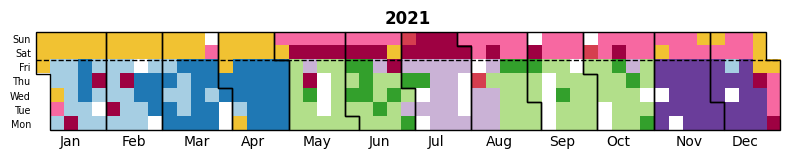

In [107]:
visualizecluster(clusterKM_labels)

cluster_id_weekdays_share [71, 3, 90, 33, 8, 5, 5, 17, 3, 1]
cluster_id_weekend_share [0, 44, 0, 0, 11, 0, 42, 0, 2, 2]
111


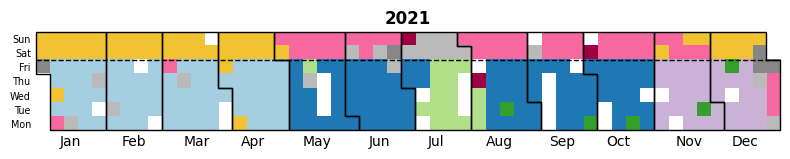

In [108]:
visualizecluster(clusterAGG_labels)

cluster_id_weekdays_share [85, 13, 66, 33, 4, 4, 1, 1, 1, 28]
cluster_id_weekend_share [0, 8, 0, 0, 40, 18, 32, 2, 1, 0]
111


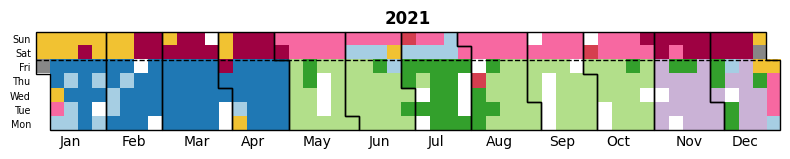

In [109]:
visualizecluster(clusterAGG_labelsGM)

cluster_id_weekdays_share [2, 37, 3, 32, 14, 3, 145]
cluster_id_weekend_share [44, 0, 35, 0, 0, 0, 22]
111


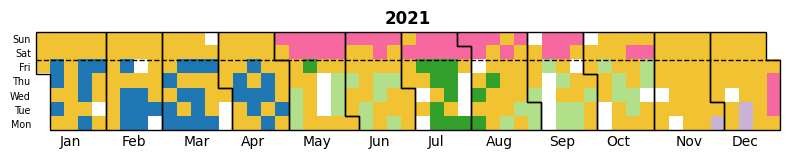

In [110]:
visualizecluster(clusterDB_labels)

cluster_id_weekdays_share [32, 36, 71, 1, 62, 24, 0, 1, 4, 5]
cluster_id_weekend_share [0, 4, 0, 30, 0, 0, 16, 2, 34, 15]
111


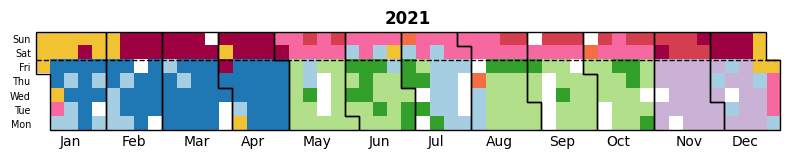

In [111]:
visualizecluster(clusterDB_labelsGM)

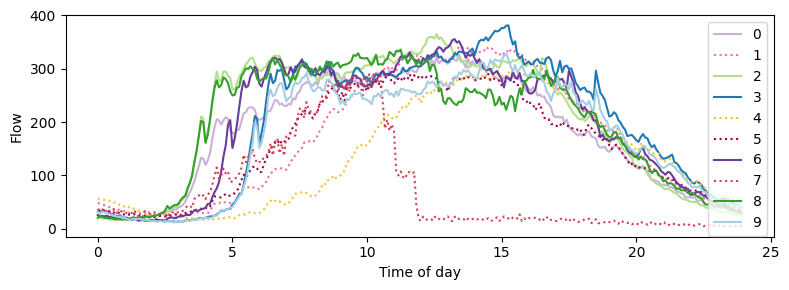

In [112]:
visualdays(clusterKM_labels)

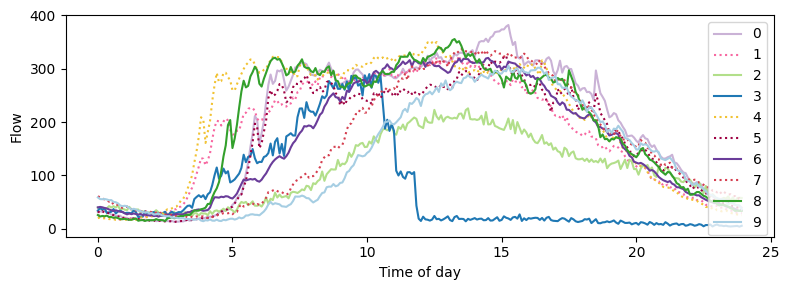

In [113]:
visualdays(clusterKM_labelsGM)

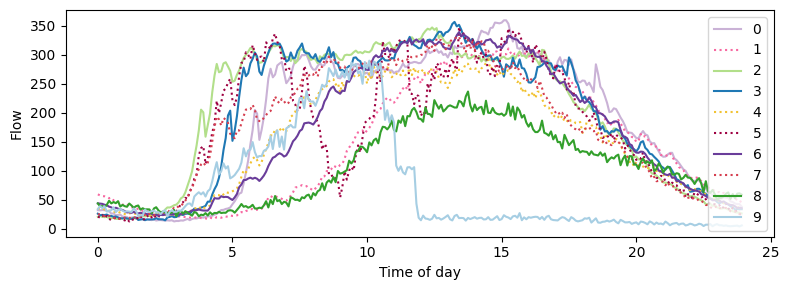

In [114]:
visualdays(clusterAGG_labels)

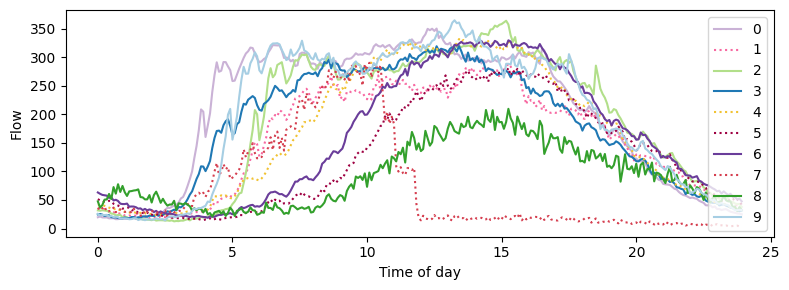

In [115]:
visualdays(clusterAGG_labelsGM)

<ipython-input-106-4c77f8859eac>:20: RuntimeWarning: Mean of empty slice
  centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(labels == i)[0], :], 0).transpose())


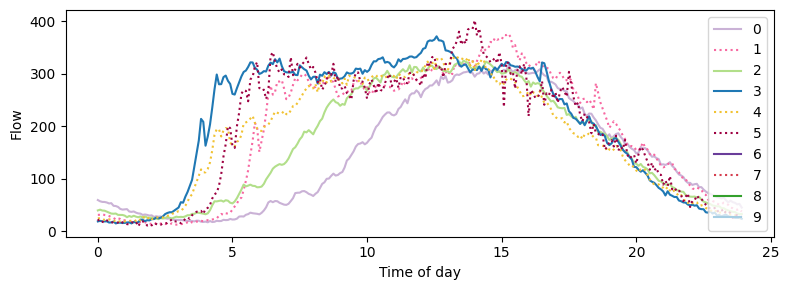

In [116]:
visualdays(clusterDB_labels)

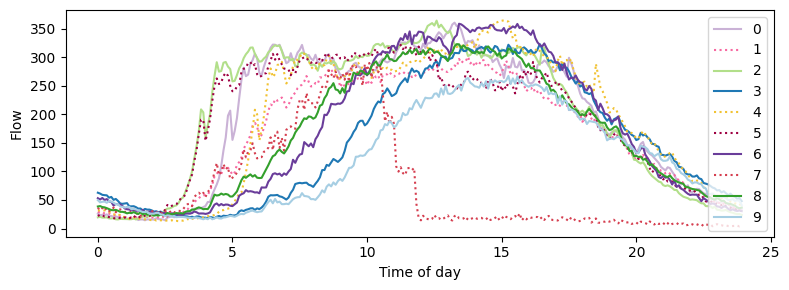

In [117]:
visualdays(clusterDB_labelsGM)